In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = 'Resources/VacuumTowerData.csv'
data_df = pd.read_csv(data_file)
data_df.head()

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Batch,Hrs Grp,Hr,B_Charge Tank,Date,Time,Hours,B_EXCHANGE OUTLET,Y_Htr Outlet Temp,B_127 Stream Temp,...,B_HEATER INLET,B_VACmmHg,Actual_VTB,Theoretical_VTB,B_Yield Variance VGO,B_Yield Variance 127,B_Yield Variance 140,B_Yield Variance 152,B_Yield Variance 160,B_Yield Variance VTB
0,1,17,1,79,1/1/2014,9:00:00 AM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.001935,0.001662,0.033842,-0.004151,0.034335
1,1,17,2,79,1/1/2014,5:00:00 PM,17,498.0,737.0,390.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.002616,0.002343,-0.002943,-0.004151,0.034335
2,1,17,3,79,1/1/2014,2:00:00 PM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021126,-0.001672,0.003208,0.034403,-0.004151,0.034335
3,1,17,4,79,1/1/2014,11:00:00 PM,17,498.0,737.0,388.0,...,39.0,40.0,0.144335,0.11,-0.021065,-0.000790,0.006117,0.003986,-0.004151,0.034335
4,1,17,5,79,1/1/2014,8:00:00 AM,17,498.0,736.0,392.0,...,39.0,39.0,0.144335,0.11,-0.021053,-0.000613,0.007392,0.036669,-0.004151,0.034335


In [3]:
# description of index, entries, columns, data types, memory info
data_df.info

<bound method DataFrame.info of        Batch  Hrs Grp  Hr B_Charge Tank       Date         Time  Hours  \
0          1       17   1            79   1/1/2014   9:00:00 AM     17   
1          1       17   2            79   1/1/2014   5:00:00 PM     17   
2          1       17   3            79   1/1/2014   2:00:00 PM     17   
3          1       17   4            79   1/1/2014  11:00:00 PM     17   
4          1       17   5            79   1/1/2014   8:00:00 AM     17   
...      ...      ...  ..           ...        ...          ...    ...   
52726    998       17  13       79 & 41  6/10/2020   3:00:00 PM     17   
52727    998       17  14       79 & 41  6/10/2020   3:00:00 AM     17   
52728    998       17  15       79 & 41  6/10/2020   1:00:00 PM     17   
52729    998       17  16       79 & 41  6/10/2020   4:00:00 PM     17   
52730    998       17  17       79 & 41  6/10/2020   2:00:00 PM     17   

       B_EXCHANGE OUTLET  Y_Htr Outlet Temp  B_127 Stream Temp  ...  \
0       

In [4]:
# number of missing values as a percentage of total observations
data_df.isnull().sum()*100/len(data_df)

Batch                            0.000000
Hrs Grp                          0.000000
Hr                               0.000000
B_Charge Tank                    0.000000
Date                             0.000000
Time                             0.000000
Hours                            0.000000
B_EXCHANGE OUTLET                0.015171
Y_Htr Outlet Temp                0.000000
B_127 Stream Temp                0.000000
B_140 Stream Temp                0.000000
B_152 Stream Temp                0.000000
B_160 Stream Temp                0.001896
Y_Top Tower Temp                 0.003793
B_VAPOR_\nIZER                   0.011379
B_BTM                            0.015171
Y_Reflux Temp                    0.001896
Y_Pump Around Temp               0.001896
B_WASH                           0.030343
Y_127 to Storage Temp            0.005689
Y_140 to Storage Temp            0.007586
Y_152 to Storage Temp            0.005689
Y_160 to Storage Temp            0.005689
Y_VTB to Storage Temp            5

In [5]:
data_df.columns

Index(['Batch', 'Hrs Grp', 'Hr', 'B_Charge Tank', 'Date', 'Time', 'Hours',
       'B_EXCHANGE OUTLET', 'Y_Htr Outlet Temp', 'B_127 Stream Temp',
       'B_140 Stream Temp', 'B_152 Stream Temp', 'B_160 Stream Temp',
       'Y_Top Tower Temp', 'B_VAPOR_\nIZER', 'B_BTM', 'Y_Reflux Temp',
       'Y_Pump Around Temp', 'B_WASH', 'Y_127 to Storage Temp',
       'Y_140 to Storage Temp', 'Y_152 to Storage Temp',
       'Y_160 to Storage Temp', 'Y_VTB to Storage Temp', 'B_VTB LEVEL',
       'Y_127 Strip Lvl Pcnt', 'Y_140 Strip Lvl Pcnt', 'Y_152 Strip Lvl Pcnt',
       'Y_160 Strip Lvl Pcnt', 'Y_Vacuum Charge Flow', 'Y_REFLUX',
       'Y_PUMP AROUND', 'Y_Wash Flow', 'Y_127 to Storage Flow',
       'Y_140 to Storage Flow', 'Y_152 to Storage Flow',
       'Y_160 to Storage Flow', 'B_VTB_TO_STRG', 'Y_8TH TUBE',
       'Y_Stripping Steam Tower Flow', 'Y_127 Stripping Stream Flow',
       'Y_140 Stripping Stream Flow', 'Y_152 Stripping Stream Flow',
       'Y_160 Stripping Stream Flow', 'B_HEATER INLE

In [6]:
# drop all rows containing null
df = data_df.dropna()
print(df.isnull().values.any())

False


In [7]:
df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)

<ipython-input-7-ed640dec04d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)


In [8]:
# Keep on Y_value Columns
df = df[['Y_Htr Outlet Temp', 'Y_Top Tower Temp', 'Y_Reflux Temp', 'Y_Pump Around Temp', 
       'Y_127 to Storage Temp', 'Y_140 to Storage Temp','Y_152 to Storage Temp', 'Y_160 to Storage Temp',
       'Y_VTB to Storage Temp', 'Y_127 Strip Lvl Pcnt', 'Y_140 Strip Lvl Pcnt', 'Y_152 Strip Lvl Pcnt',
       'Y_160 Strip Lvl Pcnt', 'Y_Vacuum Charge Flow', 'Y_REFLUX', 'Y_PUMP AROUND', 'Y_Wash Flow', 'Y_127 to Storage Flow',
       'Y_140 to Storage Flow', 'Y_152 to Storage Flow', 'Y_160 to Storage Flow', 'Y_8TH TUBE', 'Y_Stripping Steam Tower Flow',
       'Y_127 Stripping Stream Flow', 'Y_140 Stripping Stream Flow', 'Y_152 Stripping Stream Flow', 'Y_160 Stripping Stream Flow',
       'B_Yield Variance VTB']]

In [9]:
df

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
10222,738.00,269.00,150.00,180.00,212.00,213.00,194.00,225.00,223.00,58.00,...,68.10,35.10,4.20,467.50,599.00,243.50,225.40,712.80,17.00,0.063885
10232,738.00,271.00,150.00,180.00,207.00,204.00,192.00,226.00,239.00,60.00,...,68.10,34.60,3.30,449.60,602.00,241.70,227.50,719.20,17.00,0.050213
10235,737.00,271.00,150.00,180.00,211.00,21.00,190.00,228.00,232.00,62.00,...,68.30,34.60,4.80,443.60,600.30,240.90,225.10,716.80,17.00,0.050213
10244,736.00,271.00,150.00,180.00,214.00,211.00,192.00,237.00,235.00,58.00,...,68.30,34.70,3.40,448.20,601.50,241.70,227.40,717.80,17.00,0.050213
10248,737.00,270.00,150.00,180.00,207.00,208.00,198.00,224.00,221.00,57.00,...,68.30,34.90,5.20,440.10,599.40,242.10,229.70,711.40,17.00,0.063885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52725,734.95,255.38,150.04,187.12,233.40,237.65,199.65,211.85,228.35,64.33,...,48.51,27.57,2.47,468.36,587.65,240.81,135.16,133.29,0.51,0.078972
52726,735.08,254.08,149.94,185.86,235.42,243.92,198.38,210.33,229.89,58.34,...,48.50,27.41,2.52,471.87,587.33,238.40,136.46,133.30,-9.10,0.074755
52727,735.04,255.28,150.08,186.15,227.43,232.44,197.66,202.35,228.32,64.99,...,48.50,27.59,1.32,469.98,599.81,241.29,157.93,133.29,0.13,0.060066
52728,734.63,255.46,149.87,186.14,234.87,242.11,201.84,213.23,228.14,58.87,...,48.50,27.41,2.25,471.10,585.82,238.26,131.64,133.24,0.12,0.080407


In [10]:
df['B_Yield Variance VTB'].describe()

count    4180.000000
mean        0.071487
std         0.024637
min        -0.107427
25%         0.059718
50%         0.072285
75%         0.084499
max         0.199455
Name: B_Yield Variance VTB, dtype: float64

In [79]:
df[df['B_Yield Variance VTB'] <= 0]

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
13659,735.0,270.0,150.0,180.0,191.0,200.0,192.0,234.0,231.0,60.0,...,58.1,23.9,19.0,251.3,536.7,265.5,237.5,720.5,0.0,-0.047393
13661,736.0,270.0,150.0,180.0,199.0,212.0,197.0,238.0,227.0,59.0,...,58.2,25.0,17.3,253.4,539.3,264.6,241.8,726.6,0.0,-0.047393
13667,734.0,269.0,150.0,180.0,183.0,190.0,200.0,234.0,230.0,60.0,...,58.3,25.0,16.9,248.7,539.6,264.7,234.8,728.9,0.0,-0.047393
13675,734.0,270.0,150.0,180.0,207.0,205.0,198.0,227.0,233.0,60.0,...,58.3,25.9,15.9,257.0,529.2,261.7,235.4,712.1,0.0,-0.039677
13680,735.0,271.0,150.0,180.0,196.0,191.0,197.0,228.0,221.0,59.0,...,58.0,26.0,18.3,252.0,520.0,263.0,235.0,704.0,0.0,-0.048399
13684,734.0,270.0,150.0,180.0,192.0,194.0,202.0,217.0,228.0,24.0,...,58.3,25.5,19.6,250.0,541.0,264.0,238.0,731.0,0.0,-0.047393
13688,734.0,271.0,150.0,180.0,209.0,206.0,199.0,231.0,225.0,59.0,...,58.1,26.0,14.4,256.7,527.9,262.0,237.2,712.3,0.0,-0.039677
13697,734.0,270.0,150.0,180.0,199.0,196.0,201.0,224.0,224.0,60.0,...,58.1,27.0,15.9,258.4,524.3,262.3,236.5,709.3,0.0,-0.039677
13698,735.0,270.0,150.0,180.0,183.0,192.0,200.0,226.0,230.0,60.0,...,58.2,25.0,17.5,250.0,542.0,265.0,237.0,731.0,0.0,-0.047393
13699,735.0,270.0,1501.0,80.0,210.0,207.0,197.0,232.0,228.0,60.0,...,58.2,25.5,13.9,257.6,527.4,262.8,237.4,713.7,0.0,-0.048399


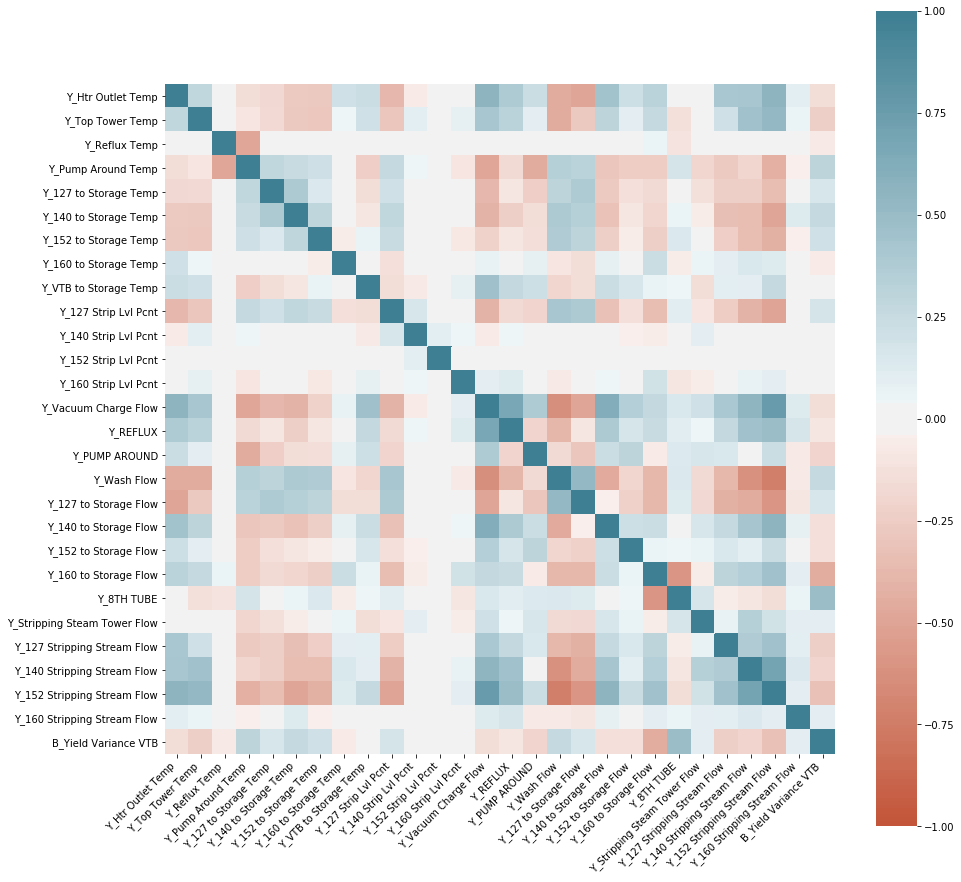

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
print(len(df.columns))

28


In [13]:
# Labels are the values we want to predict
target = np.array(df['B_Yield Variance VTB'])

# Remove the labels from the features
# axis 1 refers to the columns
data = df.drop('B_Yield Variance VTB', axis = 1)

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [15]:
print('Training Data Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Data Shape: (3135, 27)
Training Target Shape: (3135,)
Testing Data Shape: (1045, 27)
Testing Target Shape: (1045,)


In [16]:
# The baseline predictions are the historical averages
baseline_preds =  X_test[:, feature_list.index('Y_160 to Storage Flow')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  3.03


In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

In [18]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.01


In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 87.05 %.


In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Y_160 to Storage Flow Importance: 0.25
Variable: Y_PUMP AROUND        Importance: 0.14
Variable: Y_8TH TUBE           Importance: 0.1
Variable: Y_REFLUX             Importance: 0.06
Variable: Y_127 Stripping Stream Flow Importance: 0.05
Variable: Y_Top Tower Temp     Importance: 0.04
Variable: Y_127 to Storage Temp Importance: 0.04
Variable: Y_127 to Storage Flow Importance: 0.04
Variable: Y_140 to Storage Temp Importance: 0.03
Variable: Y_VTB to Storage Temp Importance: 0.03
Variable: Y_152 to Storage Flow Importance: 0.03
Variable: Y_160 Stripping Stream Flow Importance: 0.03
Variable: Y_160 to Storage Temp Importance: 0.02
Variable: Y_Wash Flow          Importance: 0.02
Variable: Y_140 to Storage Flow Importance: 0.02
Variable: Y_Stripping Steam Tower Flow Importance: 0.02
Variable: Y_Htr Outlet Temp    Importance: 0.01
Variable: Y_Reflux Temp        Importance: 0.01
Variable: Y_Pump Around Temp   Importance: 0.01
Variable: Y_152 to Storage Temp Importance: 0.01
Variable: 

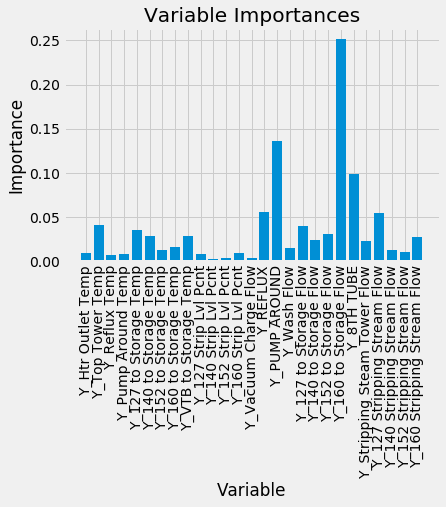

In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [76]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    #print(item)
    clf = item
    clf.fit(X_train, y_train)
    print(clf.predict(X_train),'\n')

[ 0.05678878 -0.00579727  0.0711696  ...  0.05927685  0.06939842
 -0.00359248] 

[ 4.57159386e+14 -3.82965598e+14  2.58776902e+14 ...  4.35877876e+14
  2.95709328e+14 -3.66991800e+14] 

[ 0.0853485   0.07602302  0.06530764 ...  0.0941788   0.07994026
 -0.03674503] 

[0.0714643 0.0714643 0.0714643 ... 0.0714643 0.0714643 0.0714643] 

[0.06469125 0.04707561 0.07238194 ... 0.06642737 0.07327874 0.04109828] 

[0.09422389 0.09672227 0.05204151 ... 0.10013686 0.07584659 0.01285706] 

[ 0.08520928  0.07603197  0.06507932 ...  0.09427496  0.08029796
 -0.03780569] 



In [23]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [24]:
#convert it to numpy arrays
X=df.values

In [34]:
#Scaling the values
X = scale(X)

In [35]:
pca = PCA(n_components=28)

In [70]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var

array([0.2529098 , 0.07709373, 0.06463555, 0.0533361 , 0.04861959,
       0.04506534, 0.03955647, 0.03609013, 0.0354767 , 0.03472732,
       0.0332177 , 0.0325301 , 0.02989519, 0.02842987, 0.02488427,
       0.02256619, 0.02085513, 0.01930354, 0.0183105 , 0.0165361 ,
       0.01443678, 0.01393262, 0.00968505, 0.00872862, 0.00706878,
       0.00539631, 0.00499407, 0.00171845])

In [75]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
print(var1)

[25. 33. 39. 44. 49. 54. 58. 62. 66. 69. 72. 75. 78. 81. 83. 85. 87. 89.
 91. 93. 94. 95. 96. 97. 98. 99. 99. 99.]


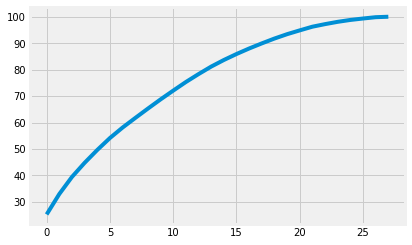

In [40]:
plt.plot(var1)

In [41]:
#Looking at above plot I'm taking 28 variables
pca = PCA(n_components=28)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[ 4.19462503e+00 -9.42004828e-01 -6.62208486e-01 ...  2.50319528e-01
   3.10717816e-01  3.12724692e-01]
 [ 4.53316546e+00 -8.50802269e-01 -5.11525253e-01 ...  3.57185382e-01
   1.48943269e-01  3.54386130e-01]
 [ 6.06620795e+00 -4.01448048e-03  2.17249871e-01 ...  3.67198064e-01
  -4.97889458e-03  5.23584711e-01]
 ...
 [-1.23196720e+00 -2.07486669e-01  3.15442515e-01 ...  1.92214425e-01
   1.54807916e-01  6.90567505e-02]
 [-1.26074920e+00 -1.35057285e-01 -2.69617314e-02 ...  1.83976368e-01
   2.46235346e-01  1.13440669e-01]
 [-1.16067964e+00  3.21355579e-01  2.17586673e-01 ...  6.35737408e-02
   1.76129807e-01  1.48270134e-01]]


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [67]:
#Bayesian optimization
def bayesian_optimization(df, function, parameters):
   X_train, y_train, X_test, y_test = df
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [68]:
BO

NameError: name 'BO' is not defined

In [63]:
bayesian_optimization(df,rfc_optimization, )

TypeError: bayesian_optimization() missing 1 required positional argument: 'parameters'

In [46]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [56]:
parameters

NameError: name 'parameters' is not defined

In [47]:
rfc_optimization(cv_splits)

NameError: name 'cv_splits' is not defined

In [48]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model